### Logistic Regression (Binary Classification)
* Data Preparation 
* Visualization
* Create Train and Test Set
* Create a Logistic Regression Model
* Predictions
* Decision Boundary
* Logistic Regression using sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
plt.style.use('seaborn')

## Data Preparation

In [3]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


## Data Visualise

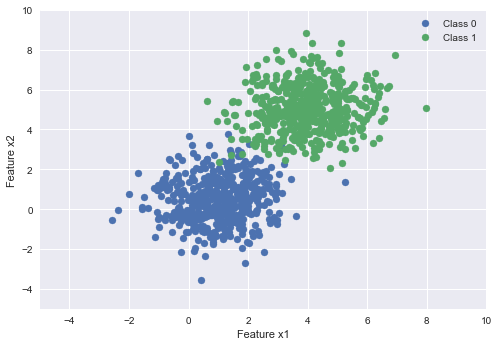

In [4]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.show()

## Create Training and Test Set

In [5]:
#We are creating a 1000*3 matrix in which the first two columns contains the features (x and y coordinates)
# and the last column contains the class.
data = np.zeros((1000,3))
print(data.shape)
print(data)

(1000, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [6]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
# First 500 rows belong to class 0 while the remaining belongs to class 1.
data[500:,-1] = 1.0
print(data)

[[0.91555685 0.85084664 0.        ]
 [1.04424352 1.5106181  0.        ]
 [1.83733539 1.25040308 0.        ]
 ...
 [3.6363709  5.24759132 1.        ]
 [3.52080877 5.2993014  1.        ]
 [4.90022126 5.43266663 1.        ]]


In [7]:
# After Shuffling the data we keep 80% of the data as training data and remaining 20% as 
# testing data
np.random.shuffle(data)
print(data[:10])

[[ 4.96371183  4.93276752  1.        ]
 [ 0.81156989 -1.21216372  0.        ]
 [ 3.20096505  3.85422513  1.        ]
 [ 5.82010236  5.20274237  1.        ]
 [ 1.73169573  0.80540608  0.        ]
 [ 5.51628756  5.55908235  1.        ]
 [ 1.96665928  3.50621635  1.        ]
 [ 1.89645938  0.23797159  0.        ]
 [ 3.71737034  5.85146376  1.        ]
 [ 3.03722822 -0.19286252  0.        ]]


In [8]:
split = int(0.8*data.shape[0])

In [9]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [10]:
#Plot the Training data and normalize it

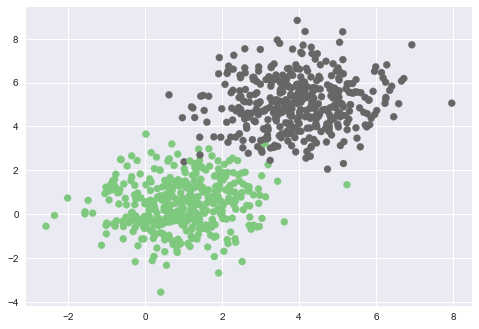

In [11]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

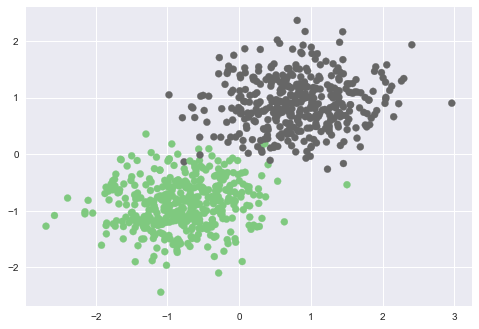

In [12]:
#Data Normalization
x_mean=X_train.mean(axis=0) # Mean along every feature
x_std=X_train.std(axis=0)  # std.deviation along every feature

#Apply the Transformation
X_train=(X_train-x_mean)/x_std

#Apply the same transformation on test data that we applied on training data.
X_test=(X_test-x_mean)/x_std

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

## Logistic Regression Implementation

In [13]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypothesis(X,theta):
    """
    X-entire arary(m,n+1)
    theta-np.array(n+1,1)
    """
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    """
    params:
    X-(m,n+1)
    y-(m,1)
    theta-(n+1,1)
    
    return:
       scalar_value=loss
    """
    hi=hypothesis(X,theta)
    e=-1*np.mean(y*np.log(hi)+((1-y)*np.log(1-hi)))
    
    return e

In [14]:
### Testing our sigmoid function
# a=np.linspace(-10,10,20)
# plt.scatter(a,sigmoid(a))

In [15]:
def gradient(X,y,theta):
    """
    params:
    X-(m,n+1)
    y-(m,1)
    theta-(n+1,1)
    return:
        gradient_vector-(n+1,1)
    """
    hi=hypothesis(X,theta)
    grad=-np.dot(X.T,(y-hi))
    m=X.shape[0]
    return grad/m
        
def gradient_descent(X,y,lr=0.5,max_itr=500):
    
    n=X.shape[1]
    theta=np.zeros((n,1))
    
    error_list=[]
    
    #Assignment-Change the Stopping Criteria
    # When change in error is very small,stop the loop
    for i in range(max_itr):
        err=error(X,y,theta)
        error_list.append(err)
        
        grad=gradient(X,y,theta)
        
        #Update
        theta=theta-lr*grad
        
    return (theta,error_list)
    

In [16]:
#  Adding the extra feature x0=1
ones=np.ones((X_train.shape[0],1))
X_New_train=np.hstack((ones,X_train))
print(X_New_train.shape)
#Everywhere we multiplied we assumed Y_train to be a column vector
Y_train=Y_train.reshape((-1,1))

(800, 3)


In [17]:
theta,error_list=gradient_descent(X_New_train,Y_train)

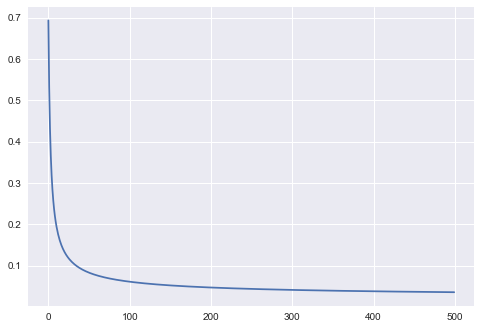

In [18]:
plt.plot(error_list)
plt.show()

In [19]:
theta

array([[-0.0375443 ],
       [ 2.52803077],
       [ 5.04298018]])

### Visualize Descision Surface

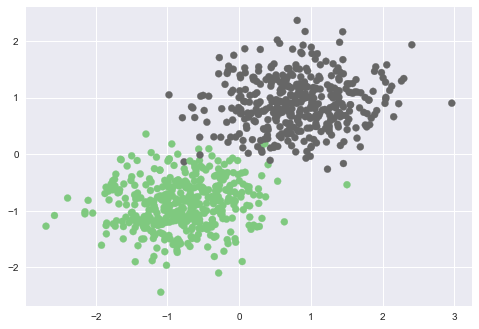

In [20]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

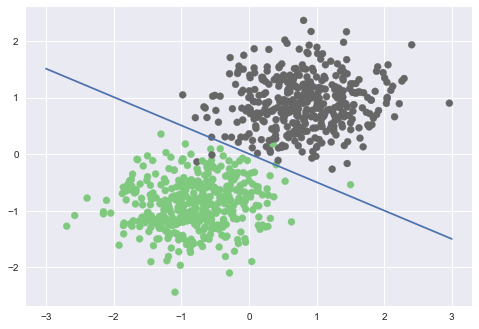

In [21]:
x1=np.arange(-3,4)
#eqn->theta0+theta1*x1+theta2*x2 (for 2 features only)
x2=-(theta[0]+theta[1]*x1)/theta[2]
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.plot(x1,x2)
plt.show()

### Prediction and Accuracy

In [22]:
# Adding x0=1 to X_test like we did with training examples.
X_New_Test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
print(X_New_Test.shape)
# print(X_New_Test)

(200, 3)


In [23]:
def predict(X,theta):
    h=hypothesis(X,theta)
    output=np.zeros(h.shape)
    
    output[h>=0.5]=1
    output=output.astype('int')
    return output

In [24]:
XT_pred=predict(X_New_train,theta)
Xt_pred=predict(X_New_Test,theta)

In [25]:
print(XT_pred.shape,Xt_pred.shape)

(800, 1) (200, 1)


In [26]:
def accuracy(actual,preds):
    actual=actual.astype('int')
    actual=actual.reshape((-1,1))
    
    acc=np.sum(actual==preds)/actual.shape[0]
    
    return acc

In [27]:
train_acc=accuracy(Y_train,XT_pred)
test_acc=accuracy(Y_test,Xt_pred)

In [28]:
print(train_acc)
print(test_acc)

0.9925
0.985


### SkLearn For Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model=LogisticRegression()

In [31]:
model.fit(X_train,Y_train)

C:\Users\SWRAJ KANT SHARMA\.conda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [32]:
theta_0=model.intercept_
theta_s=model.coef_

In [33]:
print(theta_0,theta_s)

[-0.04453721] [[2.22267006 4.99915316]]


In [34]:
model.score(X_train,Y_train)

0.99375

In [35]:
Y_pred=model.predict(X_test)

In [36]:
print(Y_pred)

[1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1.]


In [37]:
model.score(X_test,Y_test)

0.985